<a href="https://colab.research.google.com/github/fmuranda/Remote-Sensing/blob/main/tutorials/W1D2_Ocean-AtmosphereReanalysis/W1D2_Tutorial6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D2_Ocean-AtmosphereReanalysis/W1D2_Tutorial6.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D2_Ocean-AtmosphereReanalysis/W1D2_Tutorial6.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Bonus Tutorial 6: Ocean Heat Content

**Week 1, Day 2: Ocean and Atmospheric Reanalysis**

**Content creators:** Aurora Basinski

**Content reviewers:** Katrina Dobson, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Brodie Pearson, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** NFDI4Earth, CMIP

# Tutorial Objectives

*Estimated timing of tutorial:* 30 mins

In this tutorial, you will explore the ocean's vast heat capacity, which has a significant impact on the climate system.

The ocean has a heat capacity that is approximately 1000 times greater than the entire atmosphere, due to the relatively large mass and specific heat capacity of water. This means that the ocean has a significant impact on Earth's thermal equilibrium state. *Ocean heat uptake* and *ocean carbon uptake* mitigate the effect of anthropogenic climate change by absorbing roughly 90% of the excess heat and 25% of human-emitted CO$_2$. As you will see in this tutorial, ocean heat uptake largely occurs in the upper ocean as it is the region in contact with the atmosphere.

The ocean's high heat capacity also facilitates meridional ocean heat transport from the Equator to the poles, which acts in addition to the meridional *atmospheric* heat transport.

Through this tutorial, you will explore the spatial distribution of heat in the ocean and how the ocean's heat content is changing over time. To do this, you will utilize the [Estimating the Circulation and Climate of the Ocean (ECCO)](https://www.ecco-group.org/) dataset.

At the end of this tutorial, you learned how to
- quantify the Ocean heat uptake via numerical integration over a gridded dataset using the `.sum()` and `.cumsum()` functions.
- compare temporal changes of the Ocean's heat uptake within different water mass layers.

# Setup

In [1]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )

!pip install cmocean
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 91.7 MB/s eta 0:00:00


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean as cmo
import os
import pooch
import tempfile

In [3]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D2_T6"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00


In [4]:
# @title Helper functions

def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W1D2_Ocean-AtmosphereReanalysis"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [5]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [6]:
# @title Video 1: Ocean's Role in Climate

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'dPSYOC1blUg'), ('Bilibili', 'BV1gP411y7oj')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
    tabs.set_title(i, video_ids[i][0])
display(tabs)

In [7]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Oceans_Role_in_Climate_Video")

In [8]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "vyb68"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/vyb68/


In [9]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Oceans_Role_in_Climate_Slides")

# Section 1: Vertical Distribution of Heat Within the Ocean

First, let's load ECCO ocean temperature (`THETA`). This dataset contains the annual mean temperature over the period of 1992 to 2016.

Note that the [potential temperature](https://glossary.ametsoc.org/wiki/Potential_temperature) $\theta$ is commonly used in oceanographic calculations, which is why our temperature file is called `theta_annual_mean.nc` and the corresponding variable `THETA`. For the following explanations and exercises, we follow this naming convention without further discussing its definition or advantages.

In [10]:
# import preprocessed ECCO data. This data is full depth temperature data over 1992 to 2016 (annual mean)
# this file takes about 5 minutes to load
filename_theta_annual = "theta_annual_mean.nc"
url_theta_annual = "https://osf.io/c8wqt/download"

theta_annual = xr.open_dataset(pooch_load(url_theta_annual, filename_theta_annual))
theta_annual = theta_annual.THETA
theta_annual = theta_annual.where(theta_annual != 0)  # make land points equal to NaN
theta_annual

SHA256 hash of downloaded file: 058d298b4162093b080b49c14cd91f22448a22af8e255cf081e116bc83942990
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<xarray.DataArray 'THETA' (year: 25, Z: 50, latitude: 360, longitude: 720)> Size: 3GB
array([[[[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [271.24949362, 271.24949362, 271.24949362, ..., 271.24949362,
          271.24949362, 271.24949362],
         [271.2454257 , 271.2454257 , 271.2454257 , ..., 271.2454257 ,
          271.2454257 , 271.2454257 ],
         [271.24057818, 271.24057818, 271.24057818, ..., 271.24057818,
          271.24057818, 271.24057818]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
...
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]]]])
Coordinates:
    i          (longitude) int64 6kB 0 1 2 3 4 5 6 ... 714 715 716 717 718 719
    k          (Z) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    j          (latitude) int64 3kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8
  * Z          (Z) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
    dZ         (Z) float64 400B 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    Zu         (Z) float64 400B -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
    dA         (latitude, longitude) float64 2MB 1.349e+07 ... 1.349e+07
    dX         (latitude, longitude) float64 2MB 121.3 121.3 ... 121.3 121.3
  * year       (year) int64 200B 1992 1993 1994 1995 ... 2013 2014 2015 2016

Our temperature data array `THETA` has four dimensions `longitude`, `latitude`, `Z` and `year`, and contains additional information about the grid. `dX`, `dZ`, and `dA` contain the $x$, $y$, $z$ extend of the cells with respect to longitude and latitude. To visualize our data we hence have to reduce its dimensionality by averaging or slicing along a dimension axis, while always keeping the grid in mind.

Let's start with the latter and make a quick plot of the surface temperature at $Z=-5\text{m}$ for the year 1992.

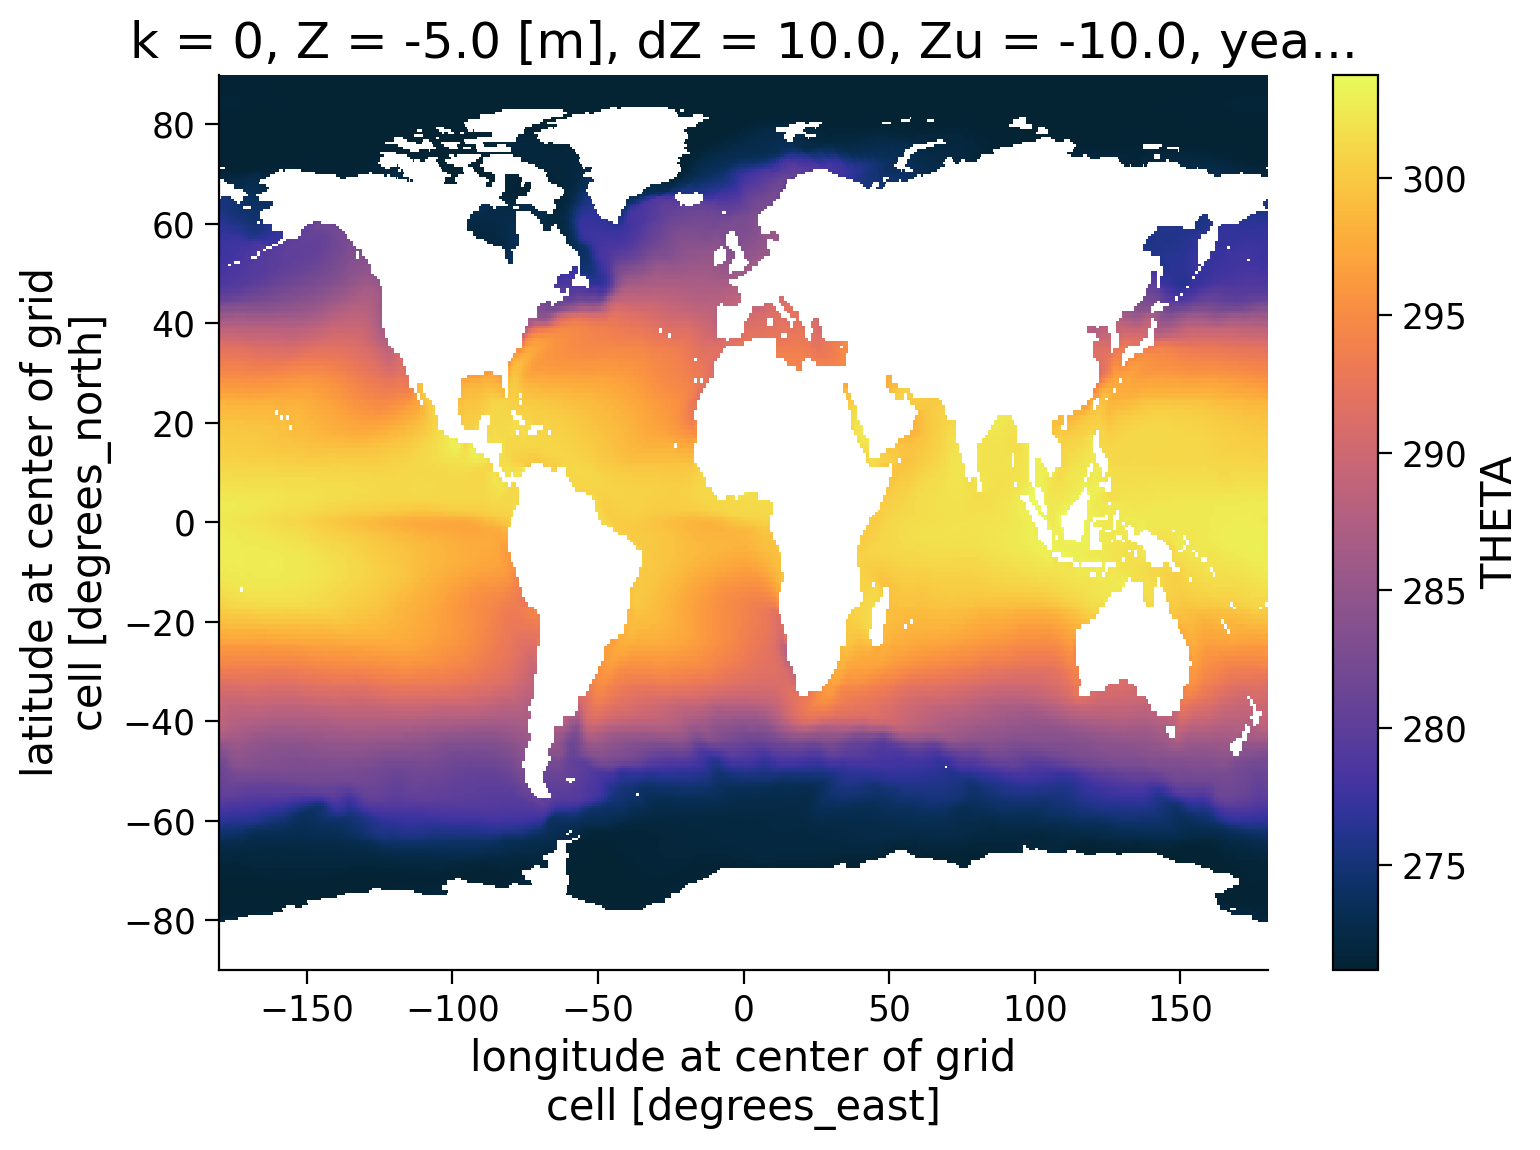

In [11]:
# Quick plot of the ocean temperature in Kelvin
theta_annual.sel(year=1992,Z=-5.0).plot(cmap=cmo.cm.thermal,
                                        add_labels=True
                                       )

The ECCO ocean temperature (`THETA`) is provided in the [SI unit](https://en.wikipedia.org/wiki/International_System_of_Units) Kelvin (K), which might be less intuitive to us. So let us now slice a few years from the data, average it temporally and convert it to degrees Celsius (°C).

In [12]:
# take the temporal mean over the period 1992 to 1994
subset_theta = theta_annual.sel(year=slice("1992", "1994")).mean("year")
# convert to °C
subset_theta_C = subset_theta - 273.15
subset_theta_C

<xarray.DataArray 'THETA' (Z: 50, latitude: 360, longitude: 720)> Size: 104MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-1.91212007, -1.91212007, -1.91212007, ..., -1.91212007,
         -1.91212007, -1.91212007],
        [-1.91375788, -1.91375788, -1.91375788, ..., -1.91375788,
         -1.91375788, -1.91375788],
        [-1.91353198, -1.91353198, -1.91353198, ..., -1.91353198,
         -1.91353198, -1.91353198]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
    i          (longitude) int64 6kB 0 1 2 3 4 5 6 ... 714 715 716 717 718 719
    k          (Z) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    j          (latitude) int64 3kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
  * latitude   (latitude) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 6kB -179.8 -179.2 -178.8 ... 179.2 179.8
  * Z          (Z) float32 200B -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
    dZ         (Z) float64 400B 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    Zu         (Z) float64 400B -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
    dA         (latitude, longitude) float64 2MB 1.349e+07 ... 1.349e+07
    dX         (latitude, longitude) float64 2MB 121.3 121.3 ... 121.3 121.3

To explore the vertical distribution of the ocean temperature, we average `THETA` along all longitudes while weighting this mean according to our grid.

Maximum temperature:  22.64 °C
Minimum temperature:  -1.91 °C


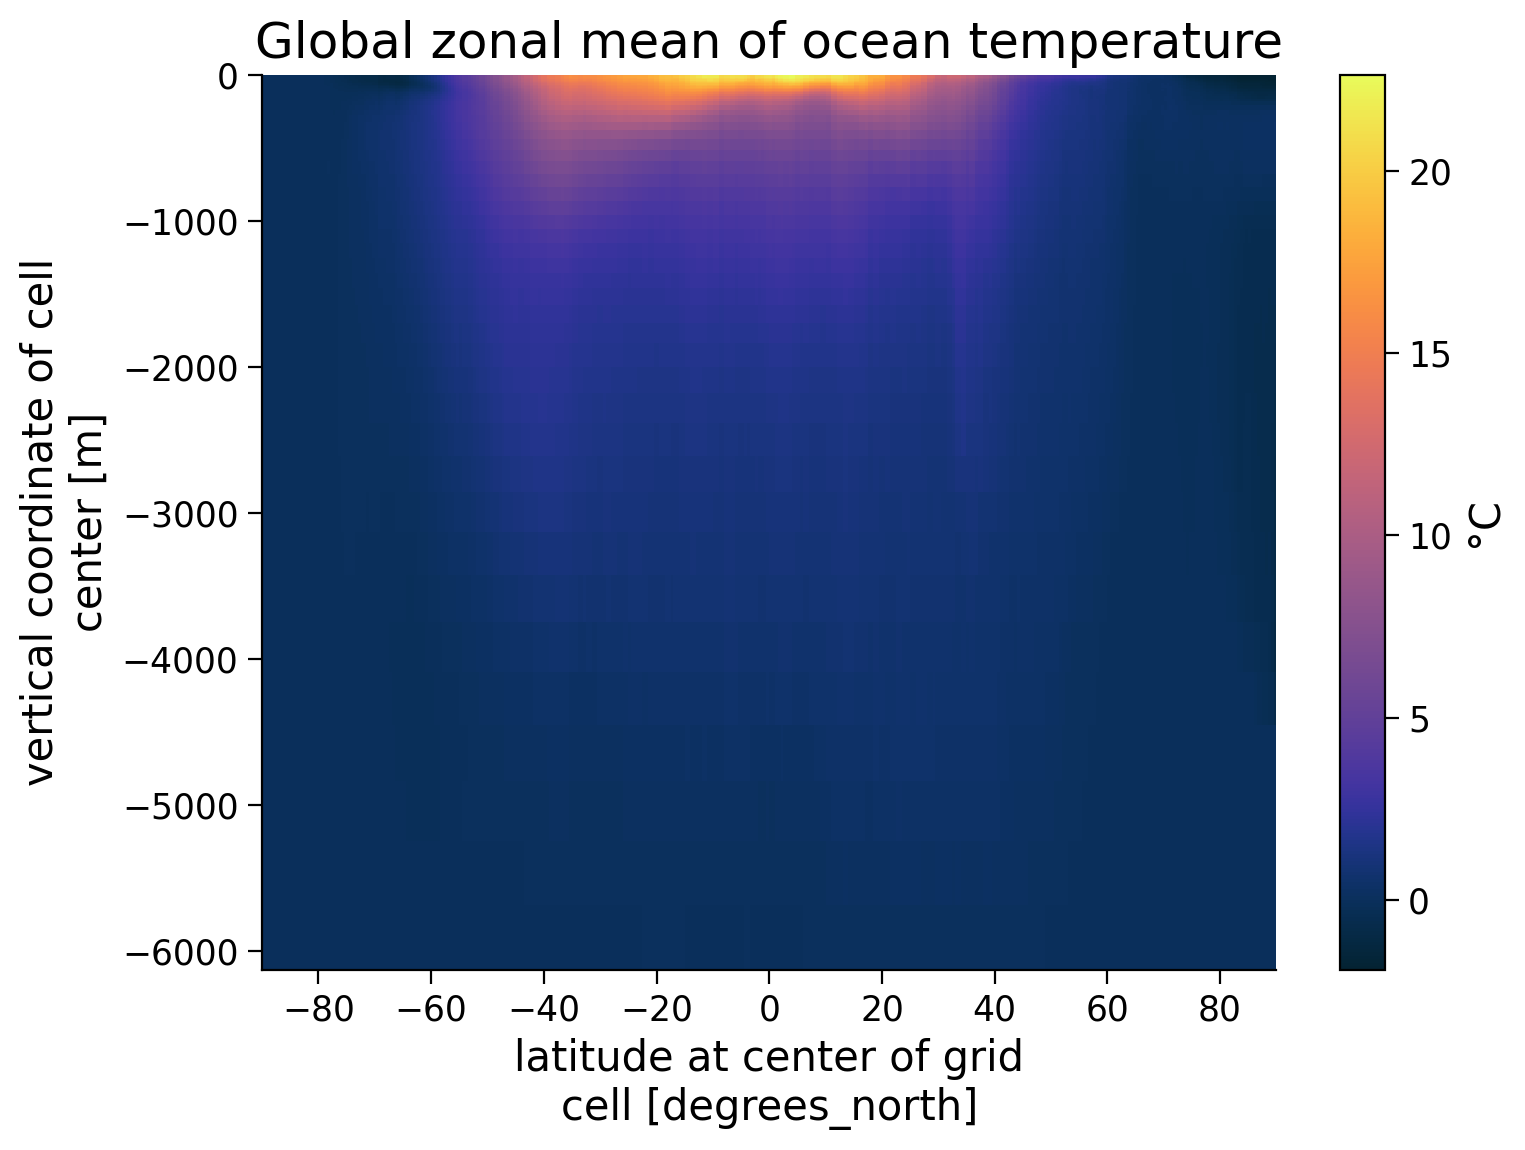

In [13]:
# plot the zonal mean section of this data
fig, ax = plt.subplots()

# we take a mean over all longitudes after weighting the contribution of every cell by their size in x-direction/longitude
zonal_mean = (subset_theta_C  * subset_theta_C.dX).sum("longitude") / subset_theta_C.dX.sum("longitude")

zonal_mean.plot(ax=ax,
                vmin=zonal_mean.min(),
                vmax=zonal_mean.max(),
                cmap=cmo.cm.thermal,
                cbar_kwargs={"label": "°C"}
               )

# aesthetics
ax.set_title("Global zonal mean of ocean temperature")
# cbar unit
print(f'Maximum temperature:  {zonal_mean.max().values:.2f} °C')
print(f'Minimum temperature:  {zonal_mean.min().values:.2f} °C')

Temperatures are warmest near the ocean's surface and close to the Equator, which suggests that heat is not distributed evenly within the ocean. In this tutorial you will explore the spatial distribution of heat storage in the ocean (i.e., ocean heat content), and how this distribution is changing over time.

Heat content is typically measured in Joules [J], which is equivalent to the units $\text{kg}*\text{m}^2/ \text{s}^2$. To determine the heat content within a specific depth range of the global ocean, i.e., between depth $z_1$ and the surface (height of $z=0 \text{m}$), you can calculate a *volume integral* over the dimensions $x,y,$ and $z$. This integral can be written as:
$$\iiint_{-z_1}^0 c_p \cdot \rho_0 \cdot \theta(x,y,z) dz dA$$

Here, $\iint dA$ represents the area integral over the $x$ and $y$ (lat, lon) coordinates. $\rho_0$ is the reference density in units of $\text{kg}*\text{m}^3$ and $c_p$ is specific heat capacity in units of $\text{J}/\left(\text{kg}*\text{K}\right)$.

In [14]:
theta_area_int = (
    (subset_theta * subset_theta.dA).sum("latitude").sum("longitude")
)  # we take an area integral first at each depth level

Text(0.5, 1.0, 'Global Ocean Heat Content above each depth')

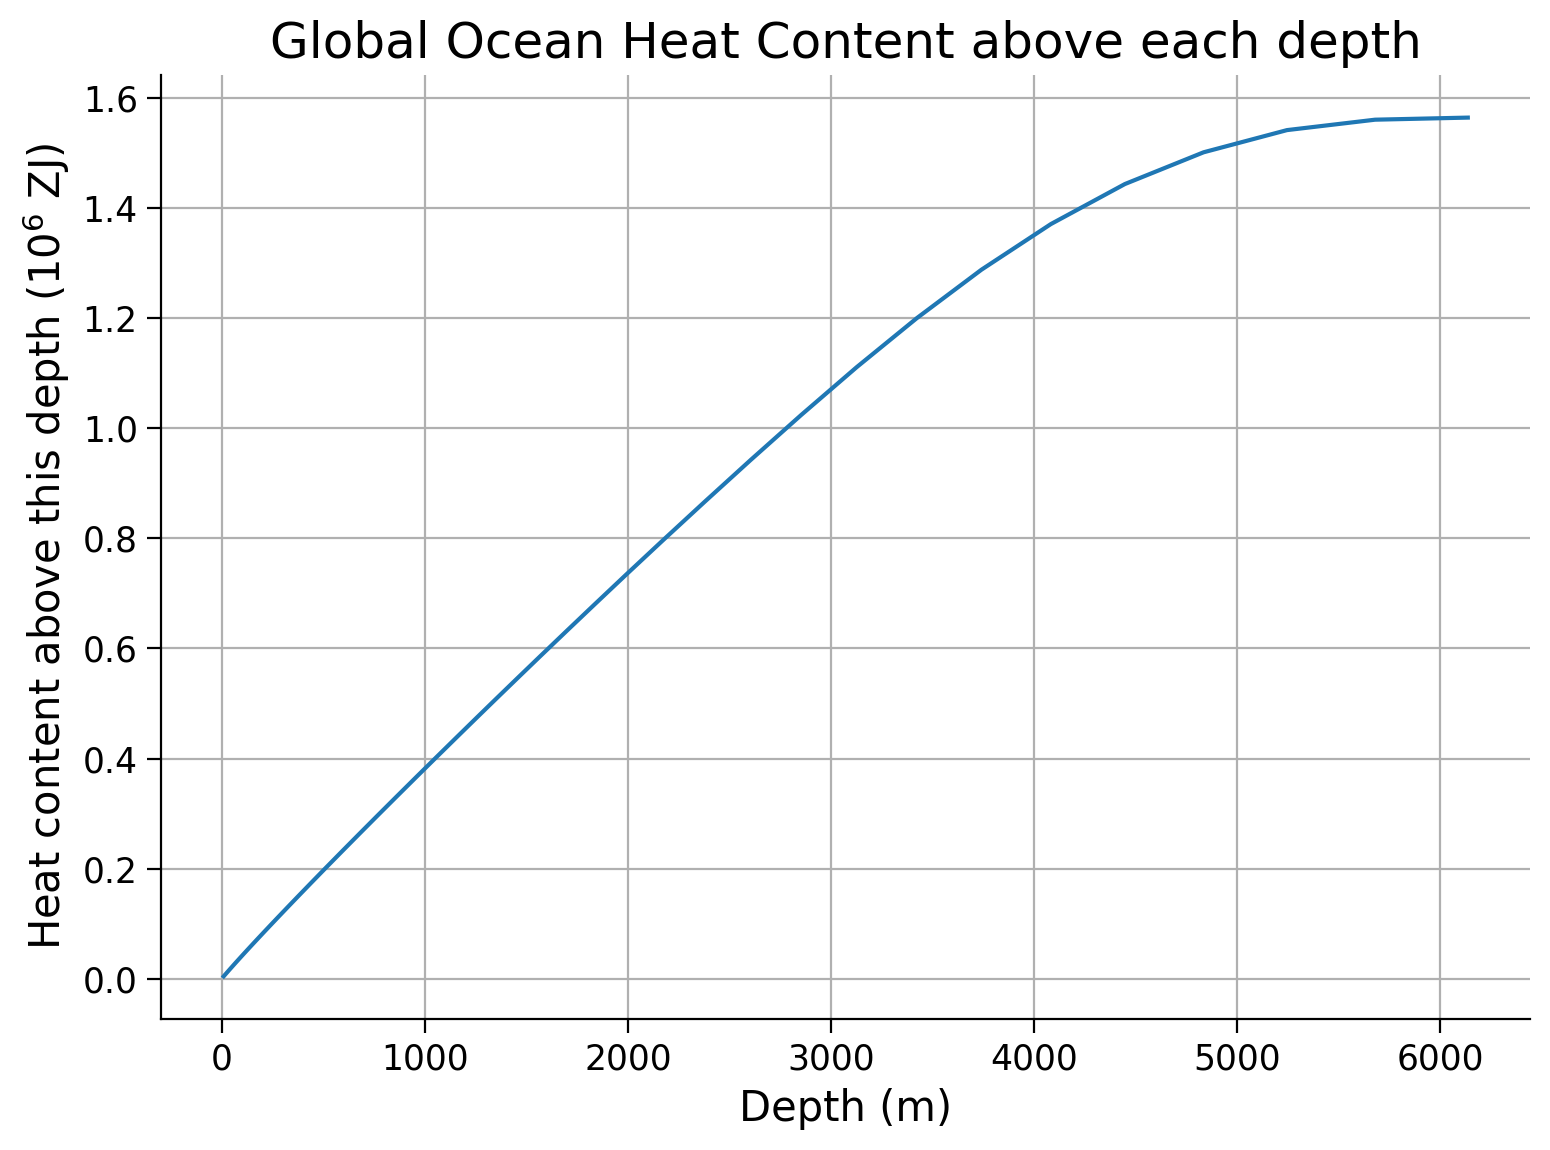

In [15]:
# define reference density of salt water and the specific heat capacity
rho = 1026  # kg/m^3
c_p = 3990  # J/(kg K)

fig, ax = plt.subplots()

# integrate with a cumulative sum to get heat content for all depths weighted by their cell size
# and multiply with the area integral from above, such that every entry in the resulting array
# is equivalent to the heat content of the water mass up above this depth.
ax.plot(
    -subset_theta.Zu, (rho * c_p * theta_area_int * subset_theta.dZ).cumsum() / 10**27
)

# aesthetics
ax.grid(True)
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Heat content above this depth ($10^6$ ZJ)")
ax.set_title("Global Ocean Heat Content above each depth")

<details>
<summary><font color='orangered'>Click here for a description of the plot  </font></summary>
Heat content that is contained in the water mass from the surface to the respective depth, for all depths calculated with a cumulative sum.
Hence, the overall global ocean heat, integrated from 6000m to the surface, is approximately 0.02 * 10^6 ZJ.

***

</details>

You can see that much of the ocean's heat is concentrated in the upper ocean (where the line is steep), with less heat stored in the deepest ocean regions (where the line plateaus). At first glance, this seems consistent with the zonal mean plot you plotted earlier in the tutorial, where the upper ocean tends to be warmer than deeper waters. However, in the integral equation above, $\theta$ is not the only depth-dependent term. The global ocean area ($A$) also varies with depth, with the area of the global ocean decreasing with depth until only a few deep trenches contain water at the greatest ocean depths.

Let's explore whether the ocean heat content plot we just created is driven by temperature variations or global ocean area variations with depth. One way to do this is to calculate and plot an integral of the global ocean area between each depth and the surface (i.e., the volume of the ocean above a each depth): $\text{Volume}(z) = \iiint_{-z_1}^0 dz dA$.

If the volume as a function of depth looks similar to the heat content plot above, it would suggest that the  smaller heat content of the deeper ocean (i.e., the plateau at large depths) is caused by the relatively small volume of water contained at these depths, rather than the vertical variations in temperature.


Text(0.5, 1.0, 'Global ocean volume above each depth')

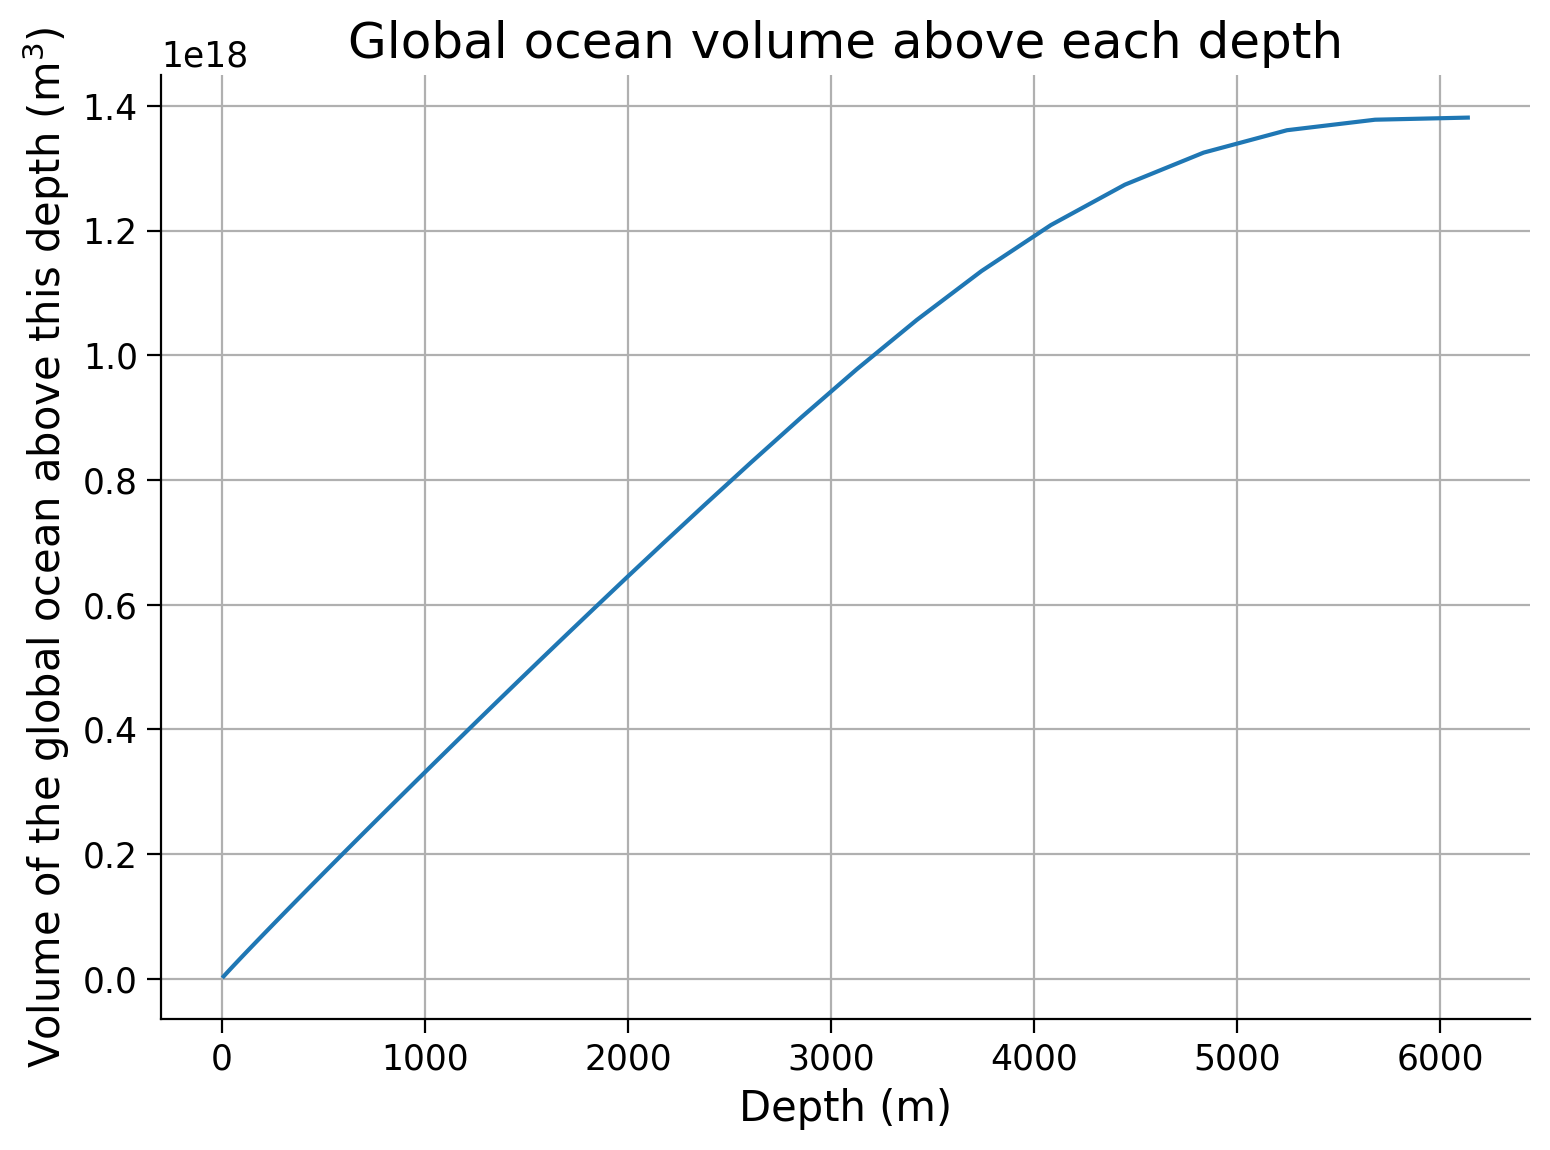

In [16]:
area_of_ocean = (
    (subset_theta * subset_theta.dA / subset_theta).sum("latitude").sum("longitude")
)  # we take an area integral first at each depth level

fig, ax = plt.subplots()
ax.plot(-subset_theta.Zu, (area_of_ocean * subset_theta.dZ).cumsum())

ax.grid(True)
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Volume of the global ocean above this depth (m$^3$)")
ax.set_title("Global ocean volume above each depth")

## Questions 1

1. Based on the last two plots, are depth-variations in ocean heat content primarily due to vertical changes in the temperature or area of the ocean?


In [17]:
# to_remove explanation

"""
1. The volume as a function of depth has a shape that is almost identical to the ocean heat content plot, which indicates that the ocean heat content above each depth is primarily shaped by depth-variations in the global ocean's area.
"""

"\n1. The volume as a function of depth has a shape that is almost identical to the ocean heat content plot, which indicates that the ocean heat content above each depth is primarily shaped by depth-variations in the global ocean's area.\n"

In [18]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1")

# Section 2: Changes in Ocean Heat Content

In this section you will examine how the total (i.e., full-depth) heat content of the ocean has changed over time. You will also explore heat content changes within two specific upper-ocean layers: one above 700 m depth and another above 2000 m depth$^*$. By analyzing these near surface layers, you will identify whether changes in the ocean's heat content are evenly distributed through the water column.

$^*$*Note: technically the grid of the data means you will be looking above 677 m and 1997 m respectively*

In [19]:
# this cell may take a while to run!
rho = 1026  # kg/m^3
c_p = 3990  # J/(kg K)
# initialize lists to store resulting values
global_heat, years_to_plot, global_heat_upper2000, global_heat_upper700 = [], [], [], []
# for every year of the data set
for year in theta_annual.year:
    # fill the years of interest list
    years_to_plot.append(int(year))
    # select a year and calculate global heat content over the whole ocean depth, ..
    subset_theta_year = theta_annual.sel(year=int(year))
    global_heat.append(
        float(
            rho
            * c_p
            * (subset_theta_year * subset_theta_year.dZ * subset_theta_year.dA)
            .sum("Z")
            .sum("latitude")
            .sum("longitude")
        )
    )
    # .., the upper 2000m
    global_heat_upper2000.append(
        float(
            rho
            * c_p
            * (
                (
                    subset_theta_year.where(subset_theta_year.Zu > -2000)
                    * subset_theta_year.dZ
                    * subset_theta_year.dA
                )
                .sum("Z")
                .sum("latitude")
                .sum("longitude")
            )
        )
    )
    # .., and the upper 700m
    global_heat_upper700.append(
        float(
            rho
            * c_p
            * (
                (
                    subset_theta_year.where(subset_theta_year.Zu > -700)
                    * subset_theta_year.dZ
                    * subset_theta_year.dA
                )
                .sum("Z")
                .sum("latitude")
                .sum("longitude")
            )
        )
    )

# we now have lists, and list don't support math operations (-)
# we also divide the values by 10**21 to make them easier to read. Unit is therefore ZJ (zetta joule)

heat_anom_fulldepth = [
    (heat - global_heat[0]) / 10**21 for heat in global_heat
]  # subtract year 1992 to get anomaly
heat_anom_upper2000 = [
    (heat - global_heat_upper2000[0]) / 10**21 for heat in global_heat_upper2000
]  # subtract year 1992 to get anomaly
heat_anom_upper700 = [
    (heat - global_heat_upper700[0]) / 10**21 for heat in global_heat_upper700
]  # subtract year 1992 to get anomaly
heat_anom_upper2000_700 = [
    a - b for a, b in zip(heat_anom_upper2000, heat_anom_upper700)
]  # difference series between 2000 m to 700 m
heat_anom_upperfulldepth_2000 = [
    a - b for a, b in zip(heat_anom_fulldepth, heat_anom_upper2000)
]  # difference series between full depth to 2000

Text(0.5, 1.0, 'Change in ocean heat content over time')

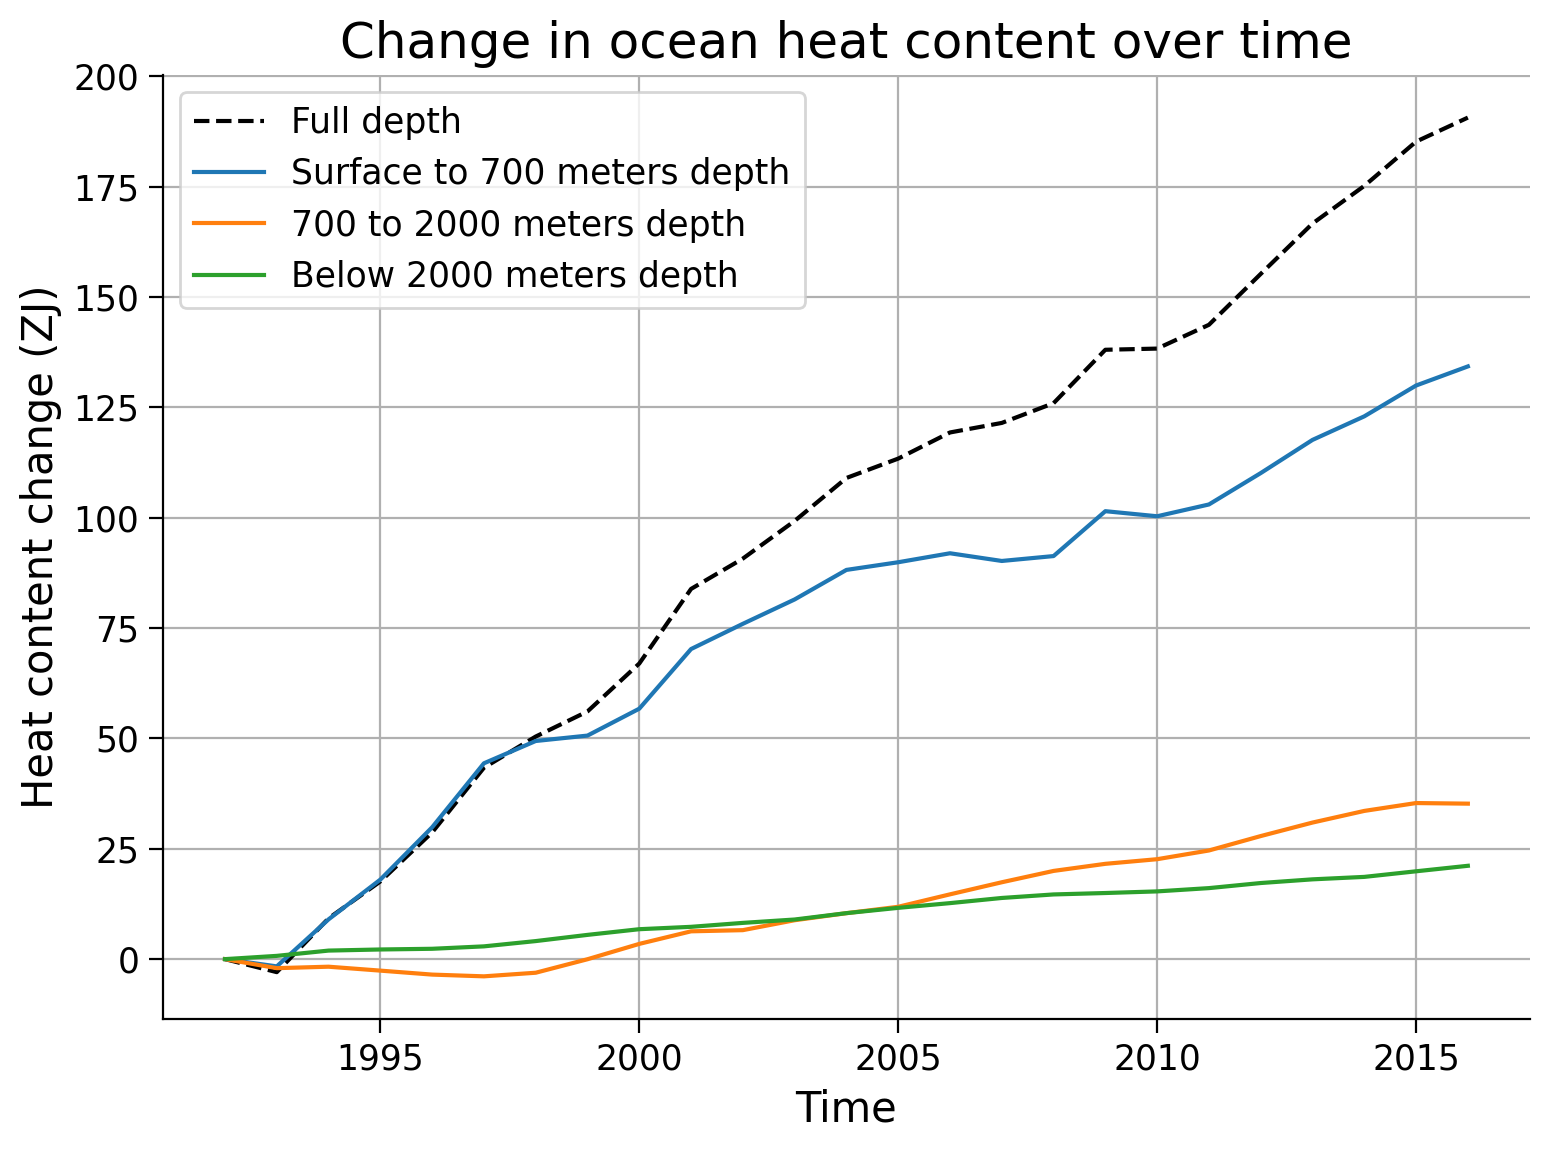

In [20]:
fig, ax = plt.subplots()

ax.plot(years_to_plot, heat_anom_fulldepth, "k--")
ax.plot(years_to_plot, heat_anom_upper700)
ax.plot(years_to_plot, heat_anom_upper2000_700)
ax.plot(years_to_plot, heat_anom_upperfulldepth_2000)

# aesthetics
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Heat content change (ZJ)")
ax.legend(
    [
        "Full depth",
        "Surface to 700 meters depth",
        "700 to 2000 meters depth",
        "Below 2000 meters depth",
    ]
)
ax.set_title("Change in ocean heat content over time")

## Questions 2

The volume of the ocean in the model that was applied to create the reanalysis product does not change over time. Thus the *changes* in ocean heat content that you just calculated are caused by changes in the ocean's temperature. Most of the ocean's warming (heat gain) has been within the upper ocean (shallower than 700 m). The deeper ocean has also warmed, but not as substantially as near-surface waters.

1. Based on this graph, what percentage of the ocean's heat gain since 1992 is contained within the top 2000 meters?


In [21]:
# to_remove explanation

"""
1. The total heat gain is around 190 ZJ, while the upper layers have gained roughly 130 ZJ (above 700 m) and 35 ZJ (700-2000 m). This means the upper 2000 m contain (130+35)/190 = 87% of the ocean's heat gain, despite containing only ~50% of the ocean's water (see the volume plot you created in Section 1).
"""

"\n1. The total heat gain is around 190 ZJ, while the upper layers have gained roughly 130 ZJ (above 700 m) and 35 ZJ (700-2000 m). This means the upper 2000 m contain (130+35)/190 = 87% of the ocean's heat gain, despite containing only ~50% of the ocean's water (see the volume plot you created in Section 1).\n"

In [22]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_2")

# Section 3: Spatial Distribution of Ocean Heat Content

You just saw that the ocean heat increase is concentrated near the ocean surface. **Now you will explore where that heat is stored as a function of latitude and longitude**. You can do this by creating a global map of ocean heat content in the upper 700 m of the ocean - which is essentially the same integral as above without the horizontal area integral: $\int_{-700m}^0 c_p\rho_0\theta(x,y,z) dz$.

Text(0.5, 1.0, 'Ocean Heat Content of top 700 m per unit area, mean of 1992 to 1994')

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


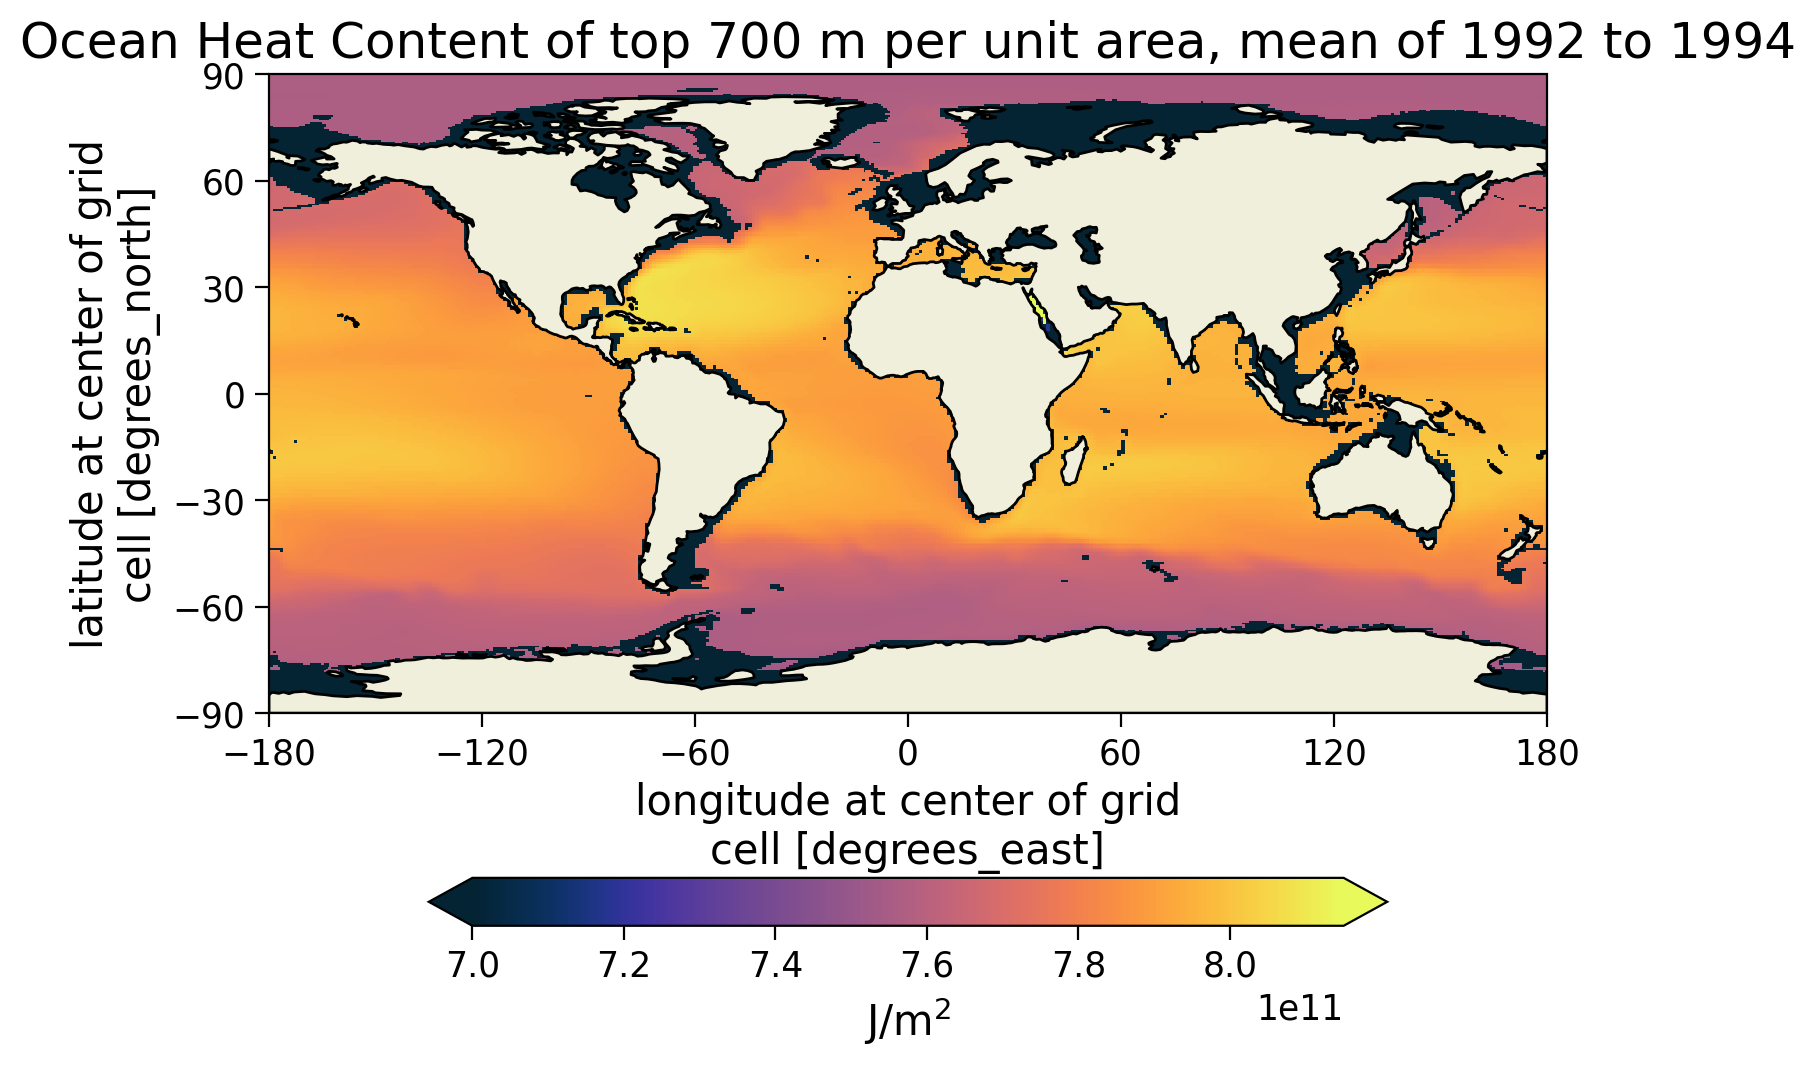

In [23]:
# first let's plot where heat is stored in the mean
fig, ax = plt.subplots(
    subplot_kw={"projection": ccrs.PlateCarree()}, dpi=100
)  # this is from cartopy https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html

p = (
    (
        (rho * c_p * subset_theta.where(-subset_theta.Zu < 700) * subset_theta.dZ).sum(
            "Z"
        )
    )
).plot(
    vmin=7e11,
    vmax=8.15e11,
    cmap=cmo.cm.thermal,
    cbar_kwargs={
        "shrink": 0.75,
        "orientation": "horizontal",
        "extend": "both",
        "pad": 0.15,
        "label": "J/m$^2$",
    },
    ax=ax,
)
ax.coastlines(color="grey", lw=0.5)
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.add_feature(cfeature.LAND, zorder=100, edgecolor="k")
ax.set_title(
    "Ocean Heat Content of top 700 m per unit area, mean of 1992 to 1994"
)

The lower latitude ocean contains more heat than the higher latitudes. This finding is consistent with your previous plot of warmer waters near the Equator during this tutorial.

*Note: the color scale of this figure was chosen to emphasize latitudinal differences in ocean heat conent. As a result, some regions with shallow water depth display as black on the plot due to their relatively low column-integrated ocean heat content ($<7 \times 10^{11} J m^{-2}$). **These black regions do not have zero ocean heat content.***

Now let's explore the spatial pattern of (full-depth) ocean heat content *rate of change* between 1992 and 2016.

In [24]:
# we already defined an object that's the mean over years 1992 to 1994 (subset_theta)
# now define an object that's the mean over 2014 to 2016
subset_theta_future = theta_annual.sel(year=slice("2014", "2016")).mean("year")

length_of_time_period = 24 * 60 * 60 * 365 * (2015 - 1993) # calculate length in seconds

# difference between future and present heat content over whole depth range
full_depth_heat_content_change = (rho * c_p * subset_theta_future * subset_theta_future.dZ).sum("Z")
- (rho * c_p * subset_theta * subset_theta.dZ).sum("Z")
# difference between future and present heat content for upper 700m layer
upper_700m_heat_content_change = (
    rho
    * c_p
    * subset_theta_future.where(-subset_theta.Zu < 700)
    * subset_theta_future.dZ
).sum("Z") - (
    rho * c_p * subset_theta.where(-subset_theta.Zu < 700) * subset_theta.dZ
).sum(
    "Z"
)

Text(0.5, 1.0, 'Rate of change in upper 700 m ocean heat content \n (2014-2016 minus 1992-1994)')

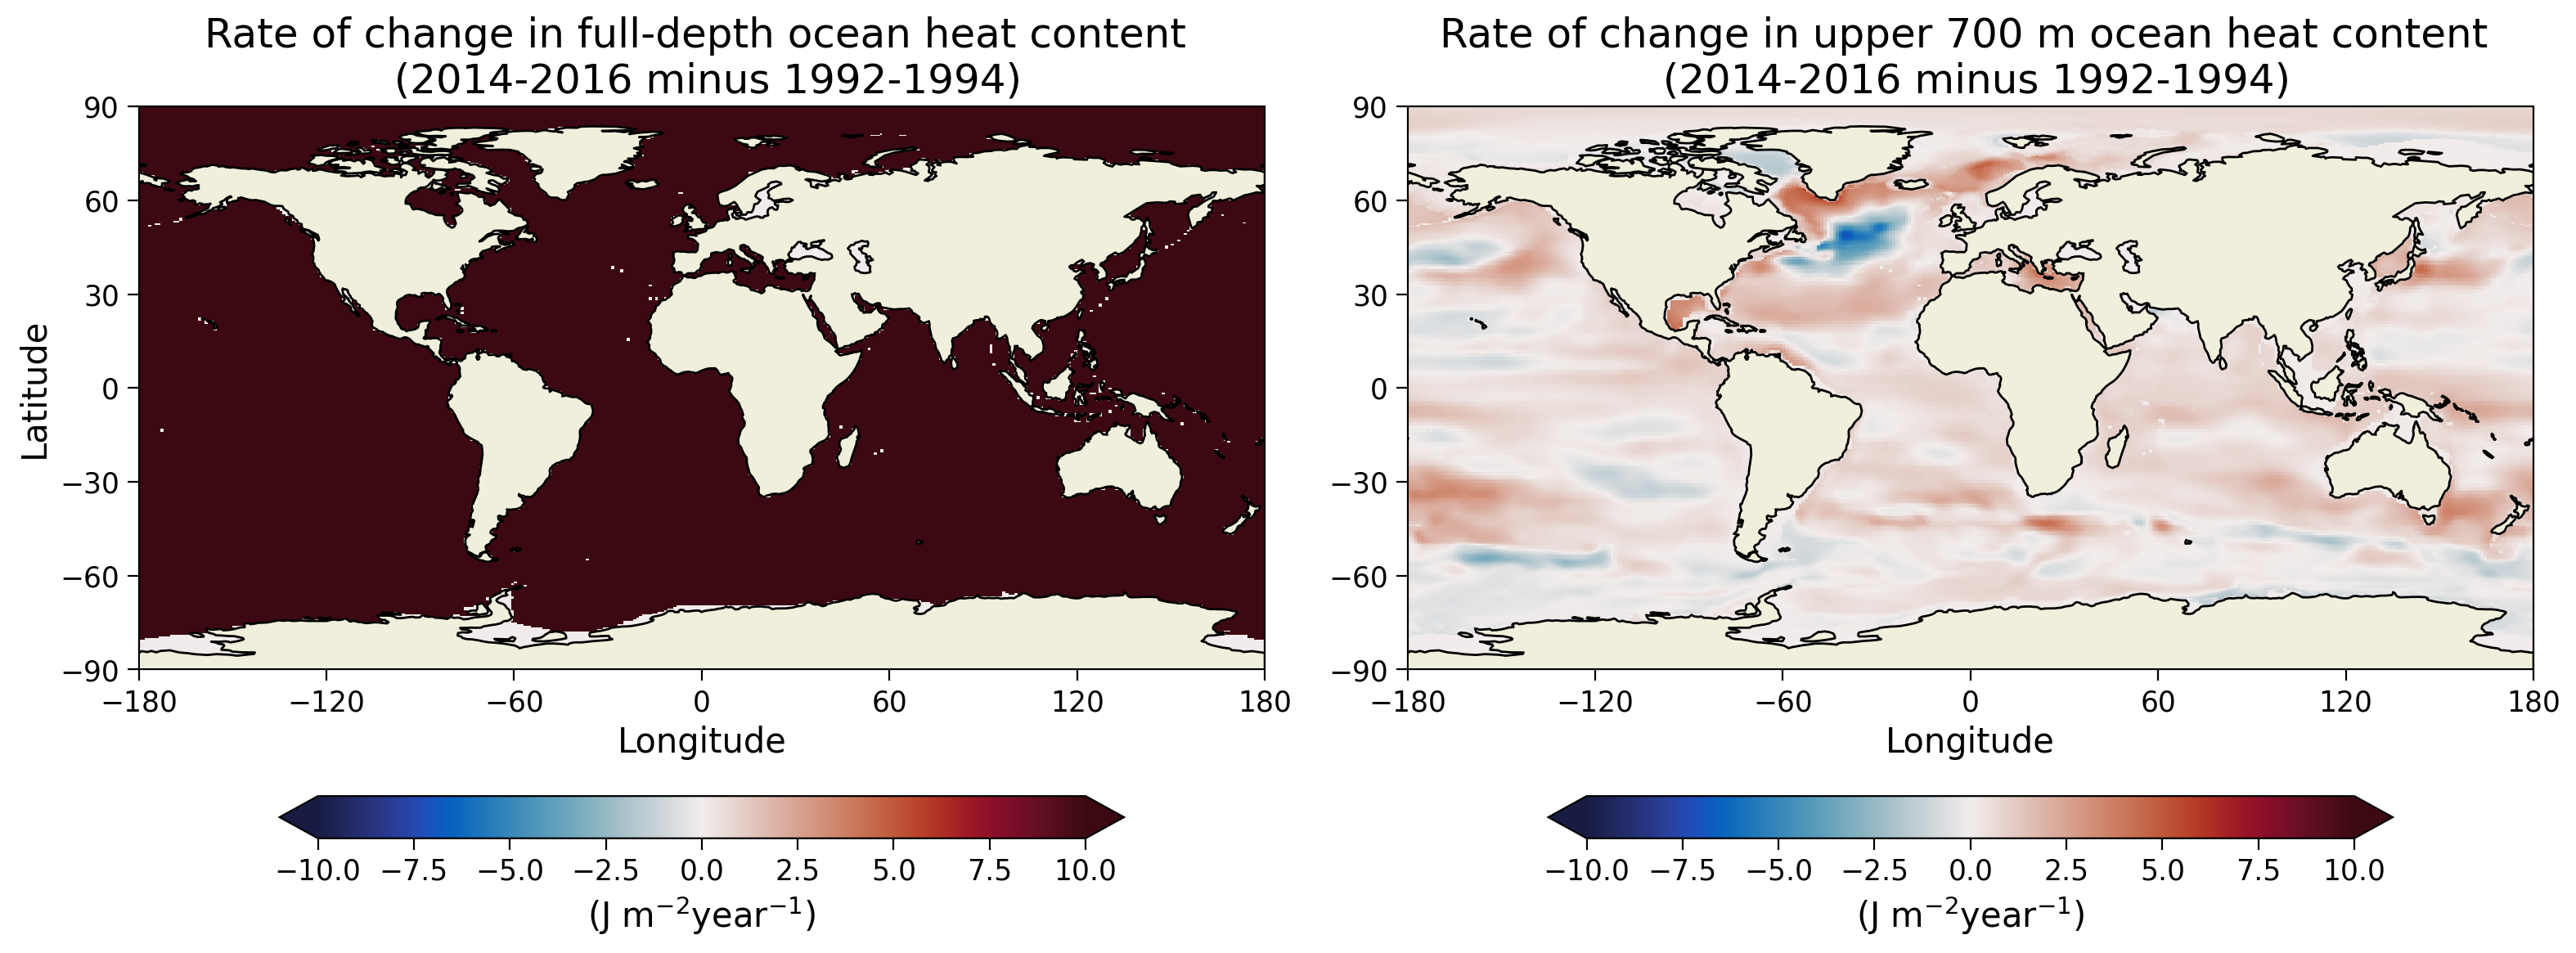

In [25]:
# plot 2 maps to compare changes in heat content in those two layers
fig, ax = plt.subplots(
    1, 2, subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(16,6), dpi=100
)  # this is from cartopy https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html
# full depth plot
(full_depth_heat_content_change / length_of_time_period).plot(
    ax=ax[0],
    vmin=-10,
    vmax=10,
    cmap=cmo.cm.balance,
    cbar_kwargs={
        "shrink": 0.75,
        "orientation": "horizontal",
        "extend": "both",
        "pad": 0.15,
        "label": "(J m$^{-2}$year$^{-1}$)",
    },
)
# upper layer plot
(upper_700m_heat_content_change / length_of_time_period).plot(
    ax=ax[1],
    vmin=-10,
    vmax=10,
    cmap=cmo.cm.balance,
    cbar_kwargs={
        "shrink": 0.75,
        "orientation": "horizontal",
        "extend": "both",
        "pad": 0.15,
        "label": "(J m$^{-2}$year$^{-1}$)",
    },
)
ax[0].coastlines(color="grey", lw=0.5)
ax[0].set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax[0].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax[0].add_feature(cfeature.LAND, zorder=100, edgecolor="k")
ax[0].set_title(
    "Rate of change in full-depth ocean heat content \n (2014-2016 minus 1992-1994)"
)
ax[1].coastlines(color="grey", lw=0.5)
ax[1].set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax[0].set_ylabel("Latitude")
ax[1].set_ylabel("")
ax[0].set_xlabel("Longitude")
ax[1].set_xlabel("Longitude")
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax[1].add_feature(cfeature.LAND, zorder=100, edgecolor="k")
ax[1].set_title(
    "Rate of change in upper 700 m ocean heat content \n (2014-2016 minus 1992-1994)"
)

With these plots, you demonstrated that ocean heat gain is not evenly distributed across space. When comparing the two plots, you once again see that the upper ocean contains a large fraction of the warming (recall that equatorial regions contribute more to the global mean than high-latitude regions because of their relatively large area).

# Summary

In this tutorial, you have quantified the spatial patterns and temporal changes of the ocean's heat content. You showed that the upper layers of the ocean contain most of the ocean's heat content, due to their relatively large area (and hence volume) compared to the deepest ocean layers. These upper layers also experience a disproportionately large fraction of the ocean warming that has been observed in recent decades. You also found that heat content distribution varies by latitude and longitude, and is typically greater in the lower latitudes, and the ocean's heat gain over time is not uniformly distributed across different oceanic regions.

# Resources

Data for this tutorial can be accessed [here](https://www.ecco-group.org/).